# Simulation Problem 8
## ML HW_4

#### import libraries, load dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv("../data/Ted/ted_main.csv")
X = data['duration'].to_numpy()
del data

#### parzen Window Etimation

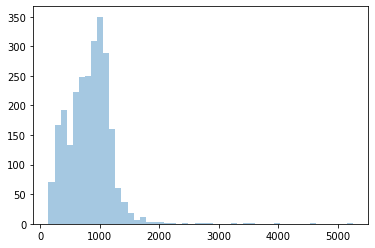

In [9]:
class parzen:
    def __init__(self, x, h, kernel):
        self.h = h
        self.x = x
        self.n = x.shape[0]
        self.kernel = kernel
        pass

    def hypercube_kernel(self, x, unit_len = 1):
        return np.ones(x.shape[0]) - np.max(np.array(np.abs(x) < 0.5 * unit_len * np.ones(x.shape), dtype=np.int16), axis=1)

    def gaussian_kernel(self, x):
        d = x.shape[0]
        return np.exp(-0.5 * np.power((np.tile(x,(self.n,1)) - self.x) / self.h), 2)  / (np.sqrt(2 * np.pi * self.h))**d


    def prob(self, x):
        probs = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            if self.kernel == "cube":
                probs[i] = np.sum(self.hypercube_kernel((np.tile(x[i],(self.n,1)) - self.x) / self.h)) / self.n
            elif self.kernel == "gaussian":
                probs[i] = np.sum(self.gaussian_kernel((np.tile(x[i],(self.n,1)) - self.x) / self.h)) / self.n
        return probs

    def plot_dist(self):
        range = np.linspace(np.min(self.x),np.max(self.x), 100)
        #ax.hist(self.x, 20, density=True, facecolor='g', alpha=0.5)
        sns.distplot(self.x, hist=True, kde= False)
        # plt.plot(range, self.prob(range))
        # plt.set_xlabel("Parameter")
        # plt.set_ylabel("frequency")
        # plt.set_title("Tarin Data and Fitted Distribution", fontsize=15)
        # plt.grid(True)
        # plt.show()

estimator = parzen(X, h = 10, kernel="gaussian")
estimator.plot_dist()

#### C

#### D (sickit learn)

/home/kassra/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


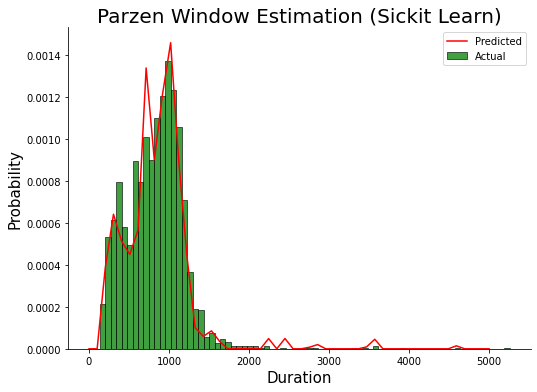

In [52]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

model = KernelDensity(kernel = 'gaussian', bandwidth=3)
model.fit(X.reshape(-1,1))

range = np.linspace(0, 5000)
predict = model.score_samples(range.reshape(-1,1))

sns.displot(X, stat="density", color="green", aspect=1.5)
p = sns.lineplot(range, np.exp(predict), color="red")
p.set_xlabel("Duration", fontsize = 15)
p.set_ylabel("Probability", fontsize = 15)
plt.title("Parzen Window Estimation (Sickit Learn)", fontsize=20)
plt.legend(labels=["Predicted", "Actual"])
plt.show()